### Daum Exchange
- `https://finance.daum.net`

In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import requests

In [5]:
# URL
url = 'https://finance.daum.net/api/exchanges/summaries'

In [8]:
# requests
response = requests.get(url)
response # HTTP status code 403 이 뜸

<Response [403]>

In [9]:
response.text # Forbidden 이라고 뜸, 서버가 user agent를 확인해서 어뷰징을 막도록 조치해논것

'<html>\r\n<head><title>403 Forbidden</title></head>\r\n<body bgcolor="white">\r\n<center><h1>403 Forbidden</h1></center>\r\n<hr><center>nginx</center>\r\n</body>\r\n</html>\r\n'

# user agent를 바꿔서 요청하기
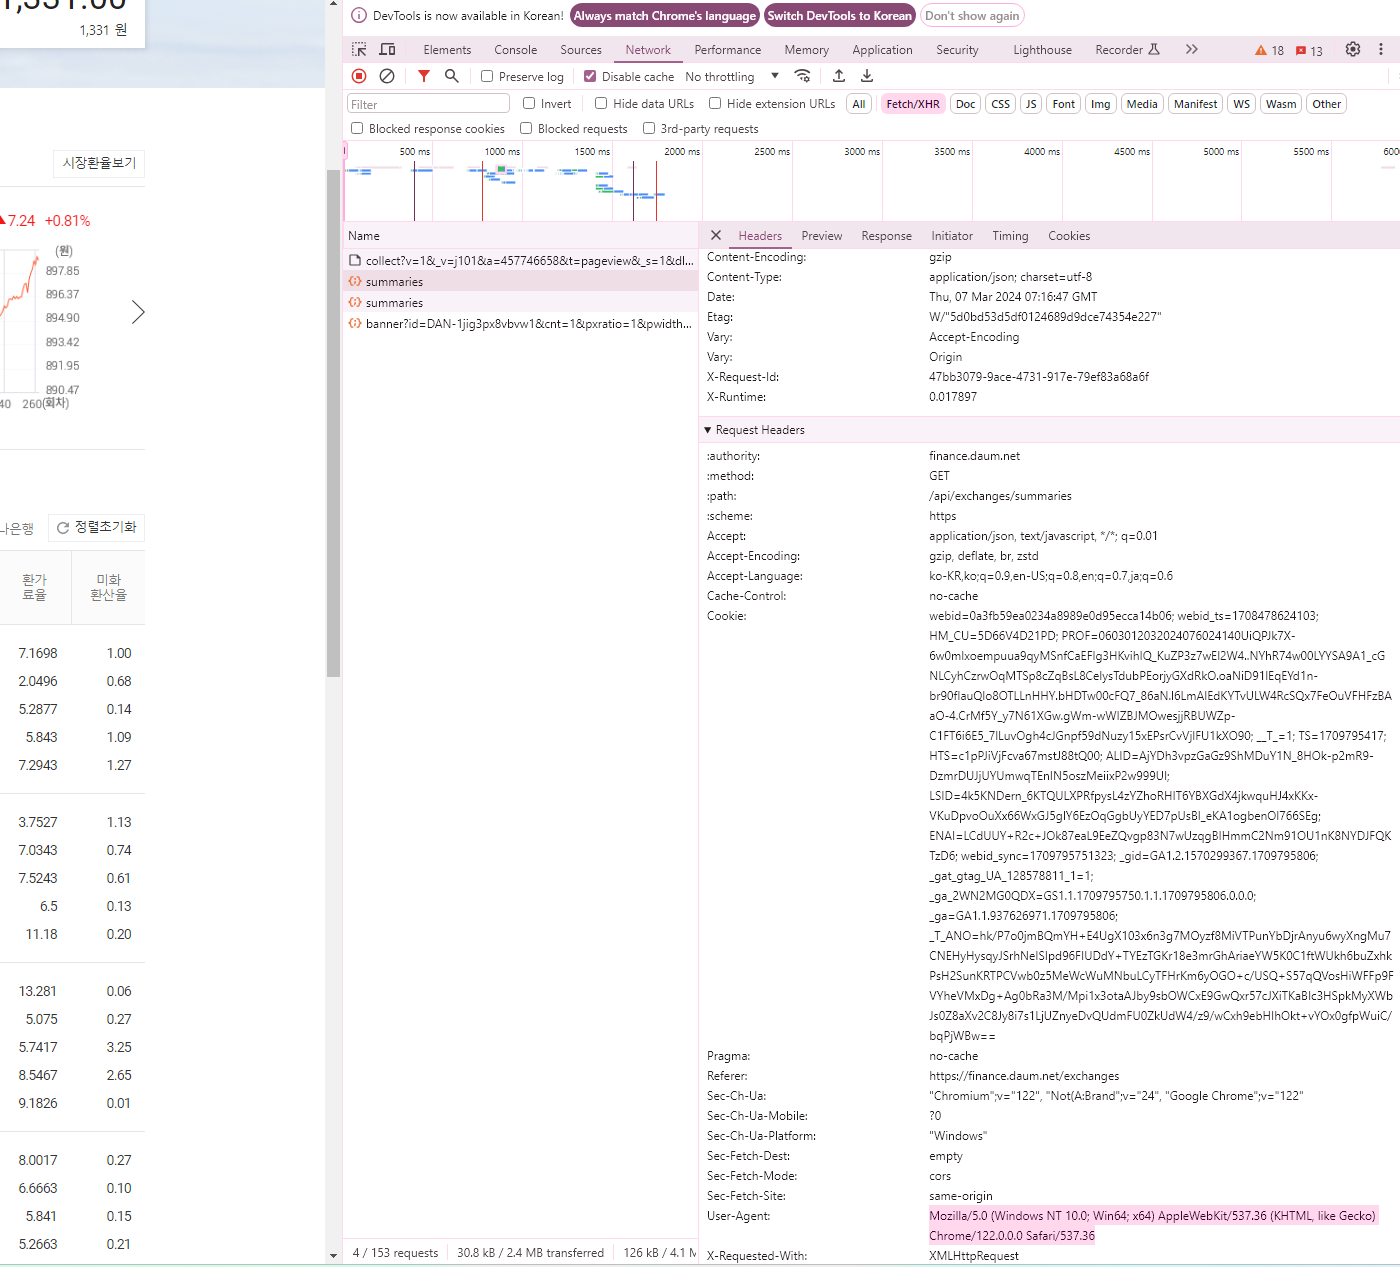

In [10]:
# requests할 때 User-Agent 를 browser의 User-Agent로 바꿔서 요청한다.
headers = {
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36'
}
response = requests.get(url, headers=headers)
response # 그래도 막혀 있다. 그럼 다른 조치도 추가로 해놨다는 의미이다.

<Response [403]>

In [13]:
headers = {
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36',
    'Referer':'https://finance.daum.net/exchanges'
}
response = requests.get(url, headers= headers)
response # 200 으로 정상적으로 받음

<Response [200]>

* 서버에서 어떻게 조치해서 막아놨는지는 하나씩 해봐야 알 수 있다.
* 보통 User-Agent 값을 통해 어뷰저 확인하던가 Referer 값까지 같이 보고 판단할 수 있기 때문에
* Browser에 있는 값들로 대체해서 요청하면, 브라우저에서 데이터를 요청한 것으로 판단하고 넘겨받을 수 있다

In [15]:
data = response.json()['data']
df = pd.DataFrame(data)
df.head()

,symbolCode,date,currencyCode,currencyName,currencyUnit,country,region,name,recurrenceCount,basePrice,...,changeRate,cashBuyingPrice,cashSellingPrice,ttBuyingPrice,ttSellingPrice,tcBuyingPrice,fcSellingPrice,exchangeCommission,usDollarRate,chartImageUrl
0,FRX.KRWUSD,2024-03-07 16:25:25,USD,달러,1,미국,"{'korName': '아메리카', 'engName': 'America'}",미국 (USD/KRW),269,1331.50,...,0.000375,1354.80,1308.20,1318.50,1344.50,None,None,7.1698,1.0000,{'day': 'https://t1.daumcdn.net/finance/chart/...
1,FRX.KRWJPY,2024-03-07 16:25:25,JPY,엔,100,일본,"{'korName': '아시아', 'engName': 'Asia'}",일본 (JPY100/KRW),269,898.30,...,0.007616,914.02,882.58,889.50,907.10,None,None,2.0496,0.6747,{'day': 'https://t1.daumcdn.net/finance/chart/...
2,FRX.KRWCNY,2024-03-07 16:25:25,CNY,위안,1,중국,"{'korName': '아시아', 'engName': 'Asia'}",중국 (CNY/KRW),269,184.63,...,0.000650,193.86,175.40,182.79,186.47,None,None,5.2877,0.1387,{'day': 'https://t1.daumcdn.net/finance/chart/...
3,FRX.KRWEUR,2024-03-07 16:25:25,EUR,유로,1,유로,"{'korName': '유럽', 'engName': 'Europe'}",유로 (EUR/KRW),269,1451.07,...,0.000096,1479.94,1422.20,1436.56,1465.58,None,None,5.8430,1.0898,{'day': 'https://t1.daumcdn.net/finance/chart/...
4,FRX.KRWGBP,2024-03-07 16:25:25,GBP,파운드,1,영국,"{'korName': '유럽', 'engName': 'Europe'}",영국 (GBP/KRW),269,1695.67,...,0.000336,1729.07,1662.27,1678.72,1712.62,None,None,7.2943,1.2735,{'day': 'https://t1.daumcdn.net/finance/chart/...
